# CAR PRICE PREDICTION

### Importing Libraries

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor


### Load the Dataset

In [39]:
df = pd.read_csv("car data.csv")

In [40]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [42]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

### Checking for null values

In [43]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [44]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [45]:
df.sample(4)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
262,amaze,2015,4.00,5.80,40023,Petrol,Dealer,Manual,0
162,Bajaj Pulsar NS 200,2012,0.45,0.99,14500,Petrol,Individual,Manual,0
132,Bajaj Avenger 220,2017,0.75,0.95,3500,Petrol,Individual,Manual,0
160,Bajaj Avenger Street 220,2011,0.45,0.95,24000,Petrol,Individual,Manual,0


In [46]:
df.shape

(301, 9)

### Calculate the correlation matrix

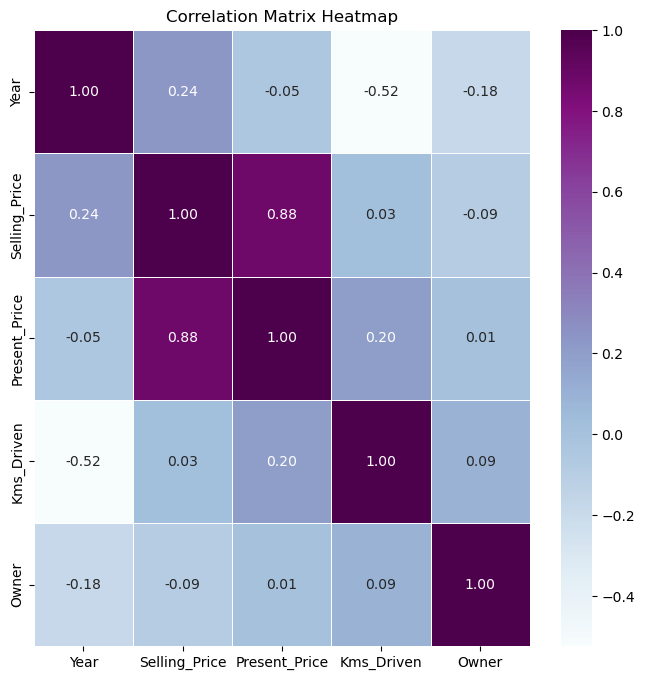

In [47]:
numeric_columns = df[['Year', 'Selling_Price', 'Present_Price',
'Kms_Driven','Owner']]
correlation_matrix = numeric_columns.corr()
# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt=".2f",
linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [48]:
#top_car
top_car = df['Car_Name'].value_counts().nlargest(10)


### Top 10 Companies with highest number of used cars for sale

C:\Users\ujju1\AppData\Local\Temp\ipykernel_23172\698112860.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = df.Car_Name, order=top_car.index, palette='viridis')


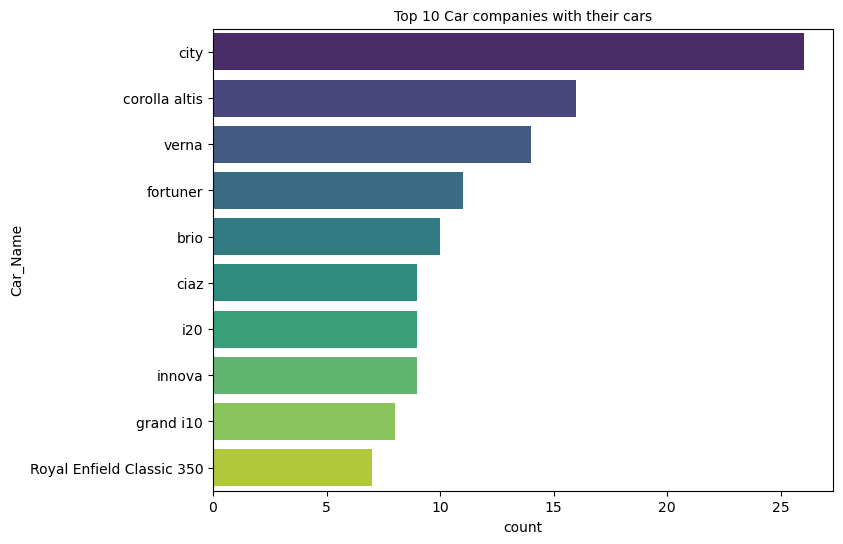

In [49]:
plt.figure(figsize = (8, 6))
sns.countplot(y = df.Car_Name, order=top_car.index, palette='viridis')
plt.title("Top 10 Car companies with their cars", fontsize = 10)
plt.show()

In [50]:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

<Axes: xlabel='Fuel_Type', ylabel='count'>

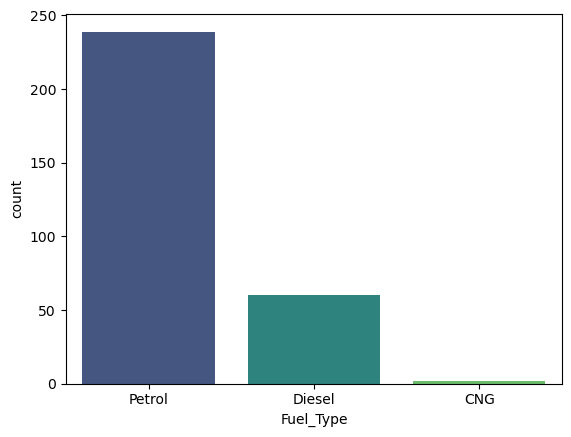

In [51]:
sns.countplot(x=df['Fuel_Type'],hue=df['Fuel_Type'],
palette='viridis')


In [52]:
df['Seller_Type'].value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

<Axes: xlabel='Seller_Type', ylabel='count'>

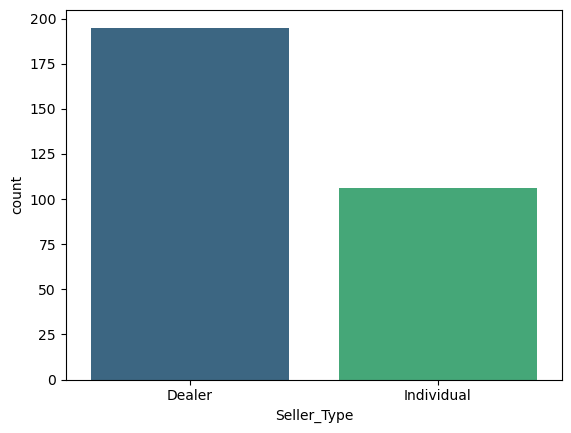

In [53]:
sns.countplot(x=df['Seller_Type'],hue=df['Seller_Type'],
palette='viridis')


In [54]:
df['Transmission'].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

#### We can see that most of the cars are 'Manual'

In [55]:
df['Owner'].value_counts()

Owner
0    290
1     10
3      1
Name: count, dtype: int64

<Axes: xlabel='Selling_Price'>

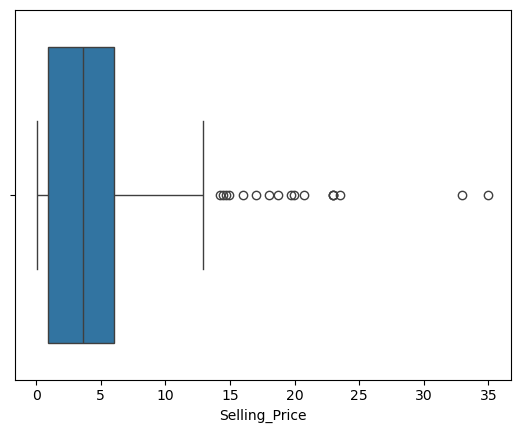

In [56]:
sns.boxplot(x=df['Selling_Price'])


In [57]:
percentile_75 = np.percentile(df['Selling_Price'],75)
sum(df['Selling_Price']>percentile_75)

74

##### There are 74 cars out of 301 having Selling_Price > 75th_Percentile

<Axes: xlabel='Selling_Price', ylabel='Count'>

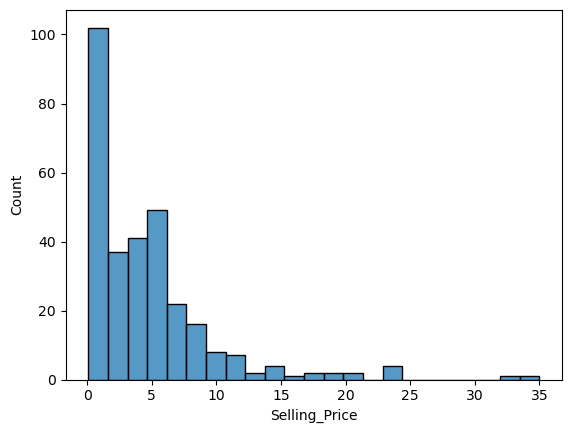

In [58]:
sns.histplot(df['Selling_Price'])

C:\Users\ujju1\AppData\Local\Temp\ipykernel_23172\3444131306.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Year'],palette = 'viridis')


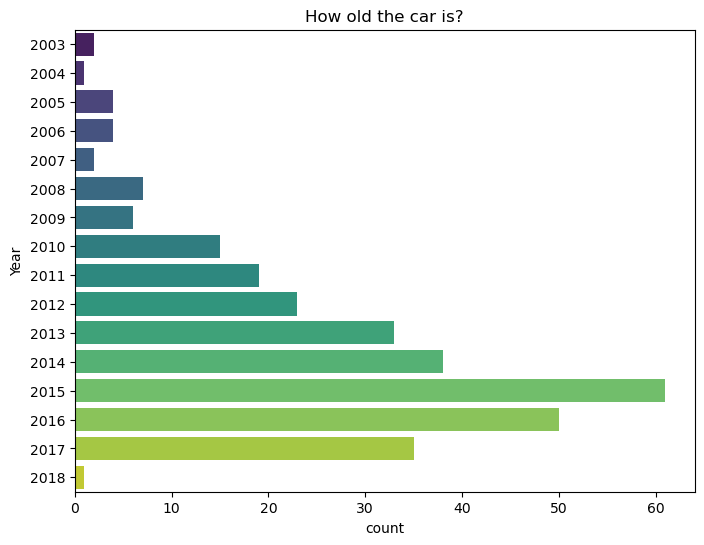

In [59]:
plt.figure(figsize = (8,6))
sns.countplot(y=df['Year'],palette = 'viridis')
plt.title('How old the car is?')
plt.show()


<Axes: xlabel='Selling_Price', ylabel='Kms_Driven'>

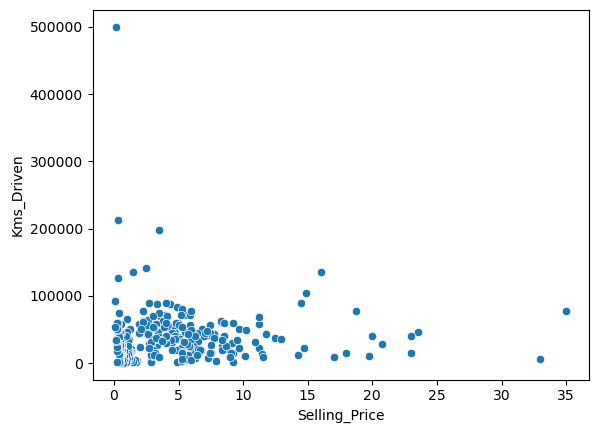

In [60]:
sns.scatterplot(x=df['Selling_Price'],y=df['Kms_Driven'])


### Non_numeric Columns


In [61]:
# Extracting non-numerical columns
df.select_dtypes(include=['object']).columns


Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

### Label Encoding


In [62]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()
# Convert the categorical columns to numerical using LabelEncoder
df['Car_Name'] = label_encoder.fit_transform(df['Car_Name'])
df['Fuel_Type'] = label_encoder.fit_transform(df['Fuel_Type'])
df['Seller_Type'] = label_encoder.fit_transform(df['Seller_Type'])
df['Transmission'] = label_encoder.fit_transform(df['Transmission'])

In [63]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0


### Splitting into training and Testing data


In [64]:
# Select features (X) and target variable (y)
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=35)

### Scaling the data_points to a common range

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Building
    • Linear Regression
    • Decision Tree Regressor
    • Random Forest Regressor
    • XGBoost Regressor
    • MLP Regressor


In [66]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
linear_reg_predictions = linear_reg.predict(X_test_scaled)


In [67]:
# Decision Tree Regressor
decision_tree_reg = DecisionTreeRegressor(random_state=42)
decision_tree_reg.fit(X_train_scaled, y_train)
decision_tree_predictions = decision_tree_reg.predict(X_test_scaled)
# Random Forest Regressor
random_forest_reg = RandomForestRegressor(n_estimators=100,
random_state=42)
random_forest_reg.fit(X_train_scaled, y_train)
random_forest_predictions = random_forest_reg.predict(X_test_scaled)
# XGBoost Regressor
xgboost_reg = xgb.XGBRegressor(objective ='reg:squarederror',
colsample_bytree = 0.3, learning_rate = 0.1,
 max_depth = 5, alpha = 10, n_estimators
= 100, random_state=42)
xgboost_reg.fit(X_train_scaled, y_train)
xgboost_predictions = xgboost_reg.predict(X_test_scaled)
# MLP Regressor
mlp_reg = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000,
random_state=42)
mlp_reg.fit(X_train_scaled, y_train)
mlp_predictions = mlp_reg.predict(X_test_scaled)

### Model Evaluation
    • Mean_Squared_Error
    • R_Squared_Error

In [68]:
# Evaluate the models
models = {'Linear Regression': linear_reg, 'Decision Tree Regressor':
decision_tree_reg,
 'Random Forest Regressor': random_forest_reg, 'XGBoost'
'Regressor' : xgboost_reg,
 'MLP Regressor': mlp_reg}
for name, model in models.items():
 predictions = model.predict(X_test_scaled)
 mse = mean_squared_error(y_test, predictions)
 r2 = r2_score(y_test, predictions)
 print(f'{name} - Mean Squared Error: {mse}, R-squared: {r2}')

Linear Regression - Mean Squared Error: 6.496077643265625, R-squared: 0.769299862197152
Decision Tree Regressor - Mean Squared Error: 2.281040983606557, R-squared: 0.9189916595597472
Random Forest Regressor - Mean Squared Error: 3.578719342459014, R-squared: 0.8729062226774784
XGBoostRegressor - Mean Squared Error: 6.967022649863374, R-squared: 0.7525748345903319
MLP Regressor - Mean Squared Error: 1.4775951625043917, R-squared: 0.9475250410592042


### The best Model is MLP Regressor having least mse (1.49) and highest r2_score (0.95)

C:\Users\ujju1\AppData\Local\Temp\ipykernel_23172\1244113167.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MSE', y='Model', data=performance_df,
C:\Users\ujju1\AppData\Local\Temp\ipykernel_23172\1244113167.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rsquared', y='Model', data=performance_df,palette='viridis')


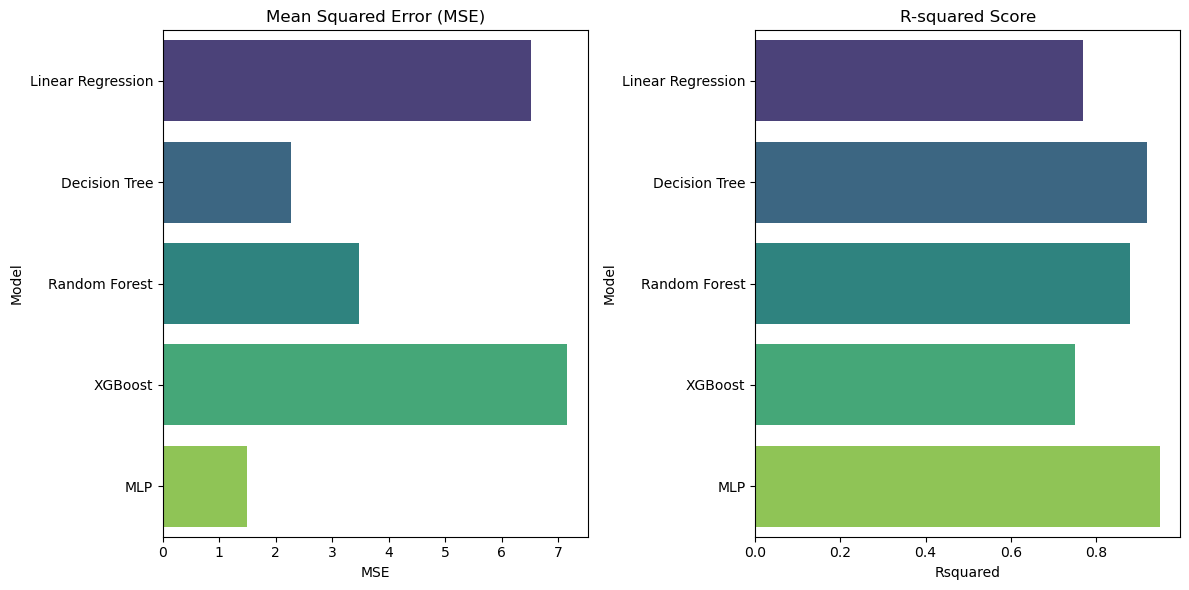

In [69]:
# Model names
models = ['Linear Regression', 'Decision Tree', 'Random Forest',
'XGBoost', 'MLP']
# Corresponding MSE and R² scores
mse_scores = [6.51, 2.27, 3.48, 7.16, 1.49]
r2_scores = [0.77, 0.92, 0.88, 0.75, 0.95]
# Create a DataFrame for easy plotting
performance_df = pd.DataFrame({'Model': models, 'MSE': mse_scores, 'Rsquared': r2_scores})
# Plotting
plt.figure(figsize=(12, 6))
# Bar plot for MSE
plt.subplot(1, 2, 1)
sns.barplot(x='MSE', y='Model', data=performance_df,
palette='viridis')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('MSE')
# Bar plot for R-squared
plt.subplot(1, 2, 2)
sns.barplot(x='Rsquared', y='Model', data=performance_df,palette='viridis')
plt.title('R-squared Score')
plt.xlabel('Rsquared')
plt.tight_layout()
plt.show()

In [77]:
feature_cols = [
    "Car_Name",
    "Year",
    "Present_Price",
    "Kms_Driven",
    "Fuel_Type",
    "Seller_Type",
    "Transmission",
    "Owner",
]

In [78]:
X = df[feature_cols]
y = df["Selling_Price"]

## Train Test Split

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## MLP Regressor Training

In [84]:
numeric_features = ["Year", "Present_Price", "Kms_Driven", "Owner"]
categorical_features = ["Car_Name", "Fuel_Type", "Seller_Type", "Transmission"]

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

mlp = MLPRegressor(
    hidden_layer_sizes=(100,),
    activation="relu",
    solver="adam",
    max_iter=1000,
    random_state=42,
)

# Pipeline = preprocessing + model
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("mlp", mlp),
    ]
)

print("🔧 Training MLP Regressor...")
model.fit(X_train, y_train)

# ----------  TESTING / EVALUATION ----------
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Training complete.")
print(f"MSE: {mse:.3f}")
print(f"R² : {r2:.3f}")

# ----------  SAVE MODEL ----------
joblib.dump(model, "car_price_model.pkl")
print("Saved MLP model as car_price_model.pkl")

🔧 Training MLP Regressor...
Training complete.
MSE: 1.211
R² : 0.947
Saved MLP model as car_price_model.pkl


In [86]:
import pandas as pd
import joblib

model = joblib.load("car_price_model.pkl")

def predict_price(
    car_name: str,
    year: int,
    present_price: float,
    kms_driven: int,
    fuel_type: str,
    seller_type: str,
    transmission: str,
    owner: int,
):
    input_df = pd.DataFrame([{
        "Car_Name": car_name,
        "Year": year,
        "Present_Price": present_price,
        "Kms_Driven": kms_driven,
        "Fuel_Type": fuel_type,
        "Seller_Type": seller_type,
        "Transmission": transmission,
        "Owner": owner
    }])
    return model.predict(input_df)[0]

price = predict_price(
    car_name="ritz",
    year=2014,
    present_price=4.5,
    kms_driven=50000,
    fuel_type="Petrol",
    seller_type="Dealer",
    transmission="Manual",
    owner=0
)
print("Predicted price:", price)


Predicted price: 0.9164196563821583
